In [1]:
import pandas as pd

In [2]:
tweets_ods = pd.read_feather('../data/tweets_ods')
tweets_ods.head()

,text,index,ODS_1,ODS_2,ODS_3,ODS_4,ODS_5,ODS_6,ODS_7,ODS_8,ODS_9,ODS_10,ODS_11,ODS_12,ODS_13,ODS_14,ODS_15,ODS_16,ODS_17
0,promotoresods desear feliz año necesitar esper...,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,aplicación regar aguar depurar enzima natural ...,7,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0
2,lunes estrenar esperar 19:30 _ 13c viajar para...,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,década cumplir objetivo agenda2030 preparar en...,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,nº 329 homenaje municipalismo 40añosdedemocrac...,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
tweets_es = pd.read_feather('../data/tweets_es')
tweets_es.head()

,index,id_tweet,id_tweet_orig,id_usuario,nom_usuario,nom_completo_usuario,desc_usuario,id_usuario_orig,nom_usuario_orig,nom_completo_usuario_orig,...,tw_idioma_orig,tw_ubicacion,tw_ubicacion_orig,tw_horacreacion,tw_horacreacion_orig,tw_retwitteadopor,tw_twitteadopor,tw_recuento_rt,tw_recuento_rt_orig,texto
0,6,1212166614298382338,1212008063357591552,439478451,laxa_lazaro,Lázaro,|Est. Lic. en Gestión Ambiental y Desarrollo S...,1207404804714176513,red_promotores,Red Internacional de Promotores ODS,...,es,Zárate Bs As,,2020-01-01T00:20:16.000Z,2019-12-31T13:50:14.000Z,laxa_lazaro,red_promotores,9,9,#promotoresods les desea feliz año. Nuestro lu...
1,7,1212166784696176640,1211675170907283457,106864114,licitacivil,licitacivil,Estudio de ingeniería y consultoría. Redacción...,4612694243,pavitek_es,Pavitek,...,es,Andalucía-Murcia,,2020-01-01T00:20:57.000Z,2019-12-30T15:47:27.000Z,licitacivil,pavitek_es,3,3,Aplicación de un riego de agua depurada con en...
2,8,1212167010588774400,1211654521811812352,1038889645952704513,accion2030,Acción 2030,"ACCIÓN 2030 ideas en movimiento, programa pilo...",918482978568900608,desafio2030,Desafio2030,...,es,Desde Chile para el Mundo,Chile,2020-01-01T00:21:50.000Z,2019-12-30T14:25:24.000Z,accion2030,desafio2030,12,12,??Es lunes de estreno ????????\nLos esperamos ...
3,9,1212168110553411584,1212102625048629248,4830621921,2018maxabel,Max Paredes,,240447091,pnud,ONU Desarrollo,...,es,Ecuador,,2020-01-01T00:26:13.000Z,2019-12-31T20:06:00.000Z,2018maxabel,pnud,29,29,A una década para cumplir con los objetivos de...
4,10,1212168154266382336,1211604376776773633,1052169736270823424,SimarroEugenia,Maria Eugenia Simarro Ossorio,Directora General de Organización y Recursos FEMP,145286901,fempcomunica,FEMP,...,es,,Madrid,2020-01-01T00:26:23.000Z,2019-12-30T11:06:08.000Z,SimarroEugenia,fempcomunica,1,1,???Nº 329\n??#HomenajeAlMunicipalismo en el @S...


Cantidad de _tweets_ por ODS

In [4]:
tweets_ods.iloc[:, 2:].dropna().apply(sum, axis=0)

ODS_1      4215
ODS_2      5484
ODS_3      8617
ODS_4      8950
ODS_5      6318
ODS_6       230
ODS_7       743
ODS_8     12339
ODS_9      9352
ODS_10     9866
ODS_11     2898
ODS_12     8568
ODS_13     1600
ODS_14       87
ODS_15     2102
ODS_16     6567
ODS_17      362
dtype: int64

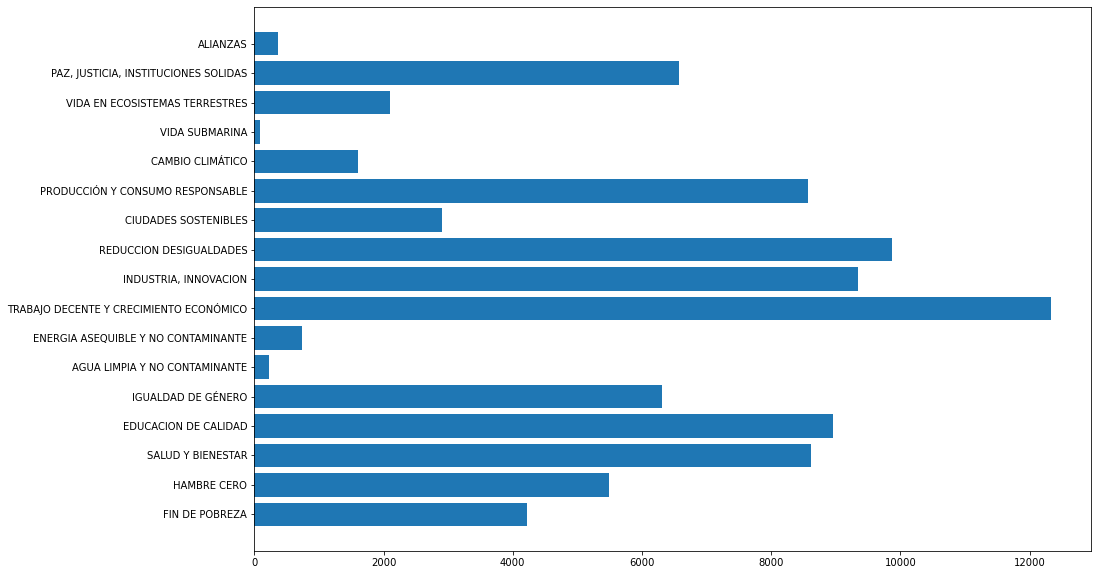

In [5]:
import matplotlib.pyplot as plt

#ods = ['ODS-' + str(i+1) for i in range(17)]
ods = pd.read_feather('../data/ods')
ods_freq = tweets_ods.iloc[:, 2:].dropna().apply(sum, axis=0)

fig = plt.figure(figsize=(15,10))
plt.barh(ods['ODS'], ods_freq);

Número de ODS por _tweet_

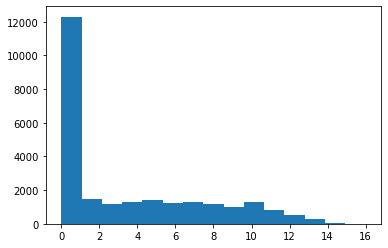

In [14]:
tweets_ods_freq = tweets_ods.iloc[:, 2:].apply(sum, axis=1)

plt.hist(tweets_ods_freq, bins=15);

Porcentaje de _tweets_ que no están asociados a ningún ODS.

In [17]:
(tweets_ods_freq == 0).sum() / tweets_ods.shape[0]

0.40875221762270847

_tweets_ con más ODS

In [18]:
tweets_ods_freq.max()

16

Vamos a ver el texto original aprovechando que disponemos del índice para hacer cruzar los datos.

In [39]:
ods_idx = tweets_ods[tweets_ods_freq >= 15]['index']

for text in tweets_es[tweets_es['index'].isin(ods_idx)]['texto']:
    print('- {}\n'.format(text))

- Con el fin de garantizar el acceso universal al agua potable???? segura y asequible para todos en 2030, es necesario realizar inversiones adecuadas en infraestructura para las personas en situaciones de vulnerabilidad. ????

#CAPSNicaragua #Comunidad #Agua #ODS #Nicaragua https://t.co/7nsgHlcTbo

- Con los voluntariados corporativos ayudas a la conservación ambiental y a la protección de nuestros recursos naturales más preciados. 

#CuencaVerde
#CuidamosElAgua
#UnionDeVoluntades
#fondosdeagua #MedioAmbiente #sostenibilidad #cambioclimatico #naturaleza #agua #environment https://t.co/IrQ5DPOZ5a

- El consumo y la producción sostenible consisten en el uso eficiente de los recursos y la energía, infraestructuras que no dañen el medio ambiente, el acceso a los servicios básicos y la creación de empleos ecológicos. #ODS #DiezAñosParaSalvarAlMundo

https://t.co/wuXobzxvTA https://t.co/fomebYgoXB

- Protege las riquezas naturales de la nación y planifica el uso y aprovechamiento de los recu